# Fitting Logistic Growth Curves

---
In this tutorial we will cover how to fit growth curves on data from PhenoTypic. For growth curves you'll typically want to use metrics of size from `pht.measure.MeasureSize`: "Size_Area" or "Size_IntegratedIntensity". These can also be obtained from `pht.measure.MeasureArea` or `pht.measure.MeasureIntensity` respectively.

Size Metric Comparison:
| Metric                          | Pros                                         | Cons |
|:--------------------------------|:---------------------------------------------|:-----|
| "Shape_Area"                    | Simple to set up<br> Captures lateral growth | Misses Vertical Growth |
| "Intensity_IntegratedIntensity" | Captures lateral and vertical growth         | Requires color correction if there's significant color drift or lots of color variation between colonies |


Phenotypic uses the following form of the logistic formula:

$N(t) = \frac{K } {1 + \frac{K - N0}{N0}  e^{-r t}}$

Which is fitted using the following loss function
 Loss Function Calculation:

$J(K,N_0,r) = \frac{1}{n}\sum_{i=1}^{n}\frac{1}{2}(f_{K,N0,r}(t^{(i)}) - N_t^{(i)})^2)
+ \lambda(\frac{dN}{dt}^2 + N_0^2)
+ \alpha \frac{\lvert K-\max({N_t})\rvert}{N_t}$

$N_t$: population size at time t

$N_0$: initial population size at time t

$r$: growth rate

$K$: Carrying capacity (maximum population size).

$\lambda$: regularization term for growth rate and initial population size

$\alpha$: penalty term for deviations in the carrying capacity relative to the largest measurement

In this tutorial we use the following:
- data was generated using `pht.measure.MeasureSize` and loaded in with `pht.data.load_area_meas()
- `pht.analysis.LogGrowthModel`


In [7]:
import phenotypic as pht

meas = pht.data.load_area_meas()
meas.head()

,Metadata_Condition,Metadata_Media,Metadata_Set,Metadata_Replicate,Metadata_Time,Metadata_Strain,Metadata_FileName,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,...,Shape_Solidity,Shape_Extent,Shape_BboxArea,Shape_MajorAxisLength,Shape_MinorAxisLength,Shape_Compactness,Shape_Orientation,Metadata_StrainID,CorrectedCarryingCapacity_Area,Metadata_Dataset
0,30C,S,3,4,24,CBS11445,30C_2_3S_4,14,263.025755,327.103517,...,12.617915,0.798024,2530.0,55.294623,46.583553,1.117302,-0.084676,220,4183.333333,S 30C
1,30C,S,3,5,24,CBS11445,30C_2_3S_5,14,309.120466,291.332736,...,13.242579,0.796078,2805.0,55.711088,51.195661,1.126356,-0.081185,220,3225.333333,S 30C
2,30C,S,3,6,24,CBS11445,30C_2_3S_6,13,312.525658,262.907288,...,13.463688,0.786102,2950.0,58.771804,50.375258,1.140002,0.063090,220,2984.666667,S 30C
3,30C,S,3,12,24,CBS11445,30C_2_3S_12,16,296.079598,305.151655,...,13.756844,0.778031,3068.0,58.834119,51.712095,1.100419,0.148893,220,3074.666667,S 30C
4,30C,S,3,8,24,CBS11445,30C_2_3S_8,14,318.208931,260.158426,...,12.146975,0.784731,2397.0,51.565716,46.664778,1.142966,0.142562,220,2988.333333,S 30C


## Fit model

In [8]:
log_model = pht.analysis.LogGrowthModel(on='Shape_Area', groupby=['Metadata_Strain'],
                                        agg_func='mean',
                                        time_label='Metadata_Time',
                                        lam=0.5,
                                        alpha=2.0,
                                        n_jobs=-1)
model_fit = log_model.analyze(meas)
model_fit.head()

,Metadata_Strain,LogGrowthModel_r,LogGrowthModel_K,LogGrowthModel_N0,LogGrowthModel_d(N)/dt,LogGrowthModel_Kmax,LogGrowthModel_NumSamples,LogGrowthModel_OptimizerLoss,LogGrowthModel_OptimizerStatus,LogGrowthModel_MAE,LogGrowthModel_MSE,LogGrowthModel_RMSE
0,CBS11445,0.140289,2739.125604,232.131902,96.067120,3018.454545,5,110428.406461,2,173.619674,37859.949733,194.576334
1,CBS1553,0.141504,2325.375396,195.264162,82.262555,2472.666667,5,59163.742809,2,130.157109,19175.974310,138.477342
2,CBS1554,0.120675,2411.460328,241.311580,72.750727,2552.125000,5,59057.086935,2,122.564463,17270.439465,131.417044


Parameters:
- `on`: What column to measure on
- `groupby`: What columns to form groups on. See also: `pandas.DataFrame.groupby()`
- `agg_func`: How to aggregate replicate time points. Default is "mean". For other options see: `pandas.DataFrame.agg()`
- `time_label`: What column is to use for the time measurement. This should be added by the user either as metadata or externally.
- `lam`: The regularization factor for specific growth rate

## Display results

(<Figure size 600x400 with 1 Axes>, <Axes: title={'center': 'mean±SE'}>)

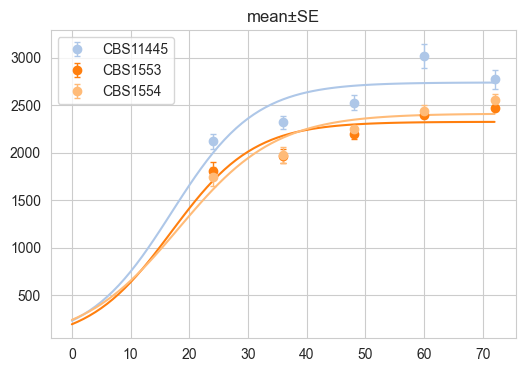

In [9]:
log_model.show()

(<Figure size 600x400 with 1 Axes>, <Axes: title={'center': 'mean±SE'}>)

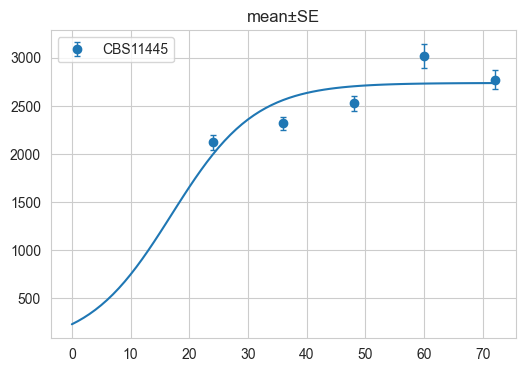

In [10]:
log_model.show(criteria={'Metadata_Strain': ['CBS11445']})

If we want to display only one of the strains, we can use the criteria like above. You can specify which column you want to filter by as a key and provide the